<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/12_Computer_Vision_Project_05082023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|평가문항	|상세기준| 내 평가 |
|--|--|--|
|1. VGG16 모델을 구현할 수 있는가?	|이미지로 제시된 VGG16 모델을 코드로 구현하였다.| <center>O</center>  |
|2. 다양한 방법을 사용하여 성능을 향상시켰는가?	|다양한 방법을 사용하여 accuracy 53% 이상을 달성하였다.| <center>O</center>  |
|3. 다양한 이미지와 모델을 사용하여 Object Detection을 수행하였는가?	|제시된 이미지 외의 다른 이미지에 Object Detection을 수행하였고,</br> 1가지 이상의 사전 학습된 모델을 사용하여 결과를 비교하였다.|  <center>O</center> |


# 1.Image Classification(VGG16 model)

## 1-1.Load Module, Prepare Datasets, Make Function

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
# 개(1), 고양이(0) 데이터 

In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)
# Data Augmentation은 Rescale, Rotation, Random Crop, Zoom, Flip 등 다양한 기법을 사용하여 데이터의 양을 증가시키는 것. 
# range의 숫자를 변화시키거나 Flip에서 True/False를 적절하게 사용하여 다양한 실험 가능.

In [ ]:
# .flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
# 데이터 셋을 무한히 반복시키기 위해
# 개와 고양이를 분류하는 task를 수행하기 때문에class_mode는 'binary'. 
# Classification task에 따라 class_mode를 변경하면 됨.

Found 2000 images belonging to 2 classes.


In [ ]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

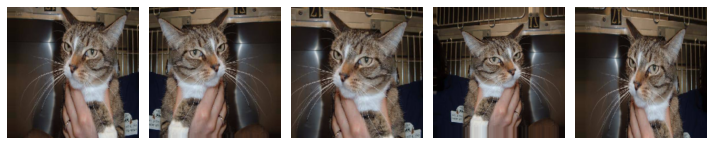

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)  
# train data와 같은 작업을 하는데 classification 때문에 스케일만 변경

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


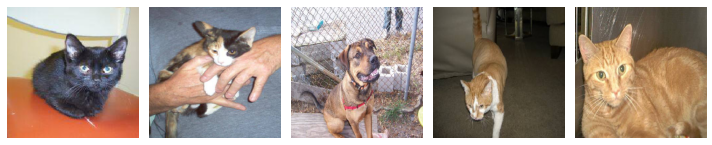

In [ ]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
_[:5] # 정답 데이터

array([0., 0., 1., 0., 0.], dtype=float32)

## 1-2.VGG16 Model



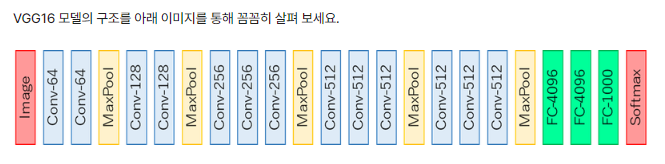



In [ ]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3)) # input size : 256*256, channel 3ea
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer) # filter 32ea, kernal size : 3*3, padding
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x) 
# x=tf.keras.layers.BatchNormalization()(x) 
# x=tf.keras.layers.MaxPool2D((2, 2))(x) #maxpooling

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
# x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x) #VGG16 모델은 원래 output이 원래 1000이지만 binary 모델이니 1로 설정

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_60 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 128, 128, 128)     147

In [ ]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
history1 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 44s 343ms/step - loss: 178.4333 - binary_accuracy: 0.5000 - val_loss: 43.2434 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 42s 336ms/step - loss: 0.7070 - binary_accuracy: 0.5000 - val_loss: 0.7321 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 42s 337ms/step - loss: 0.7031 - binary_accuracy: 0.5000 - val_loss: 0.7212 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 42s 336ms/step - loss: 0.7340 - binary_accuracy: 0.5000 - val_loss: 0.6999 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 42s 337ms/step - loss: 0.6980 - binary_accuracy: 0.5000 - val_loss: 0.6883 - val_binary_accuracy: 0.5000


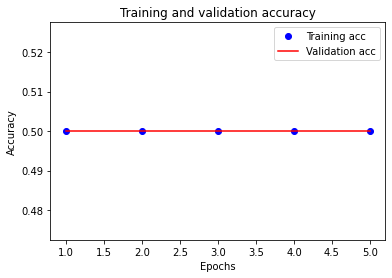

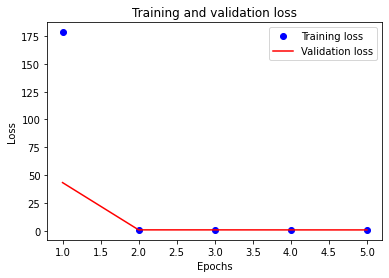

In [ ]:
acc = history1.history['binary_accuracy']
val_acc = history1.history['val_binary_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 1-3.Modify Hyperparameter

Epoch 1/10
125/125 [==============================] - 43s 330ms/step - loss: 1.7043 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 41s 325ms/step - loss: 0.6936 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 41s 326ms/step - loss: 0.6937 - binary_accuracy: 0.5000 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 41s 326ms/step - loss: 0.6936 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 41s 326ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 41s 326ms/step - loss: 0.6937 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 7/10
125/125 [==========================

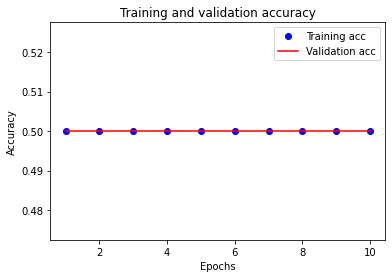

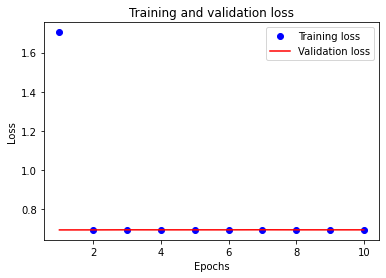

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


# loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


# training
history2 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


# graph
acc = history2.history['binary_accuracy']
val_acc = history2.history['val_binary_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- VGG16 모델에서 마지막 레이어의 activation function을 softmax로 한 경우 여러 batch_size, epochs, learning_rate 값으로 학습을 하여도 성능(accuracy)가 좋아지지 않았음. 
- 좋아지지 않은 학습 내용은 코드가 길어져 지움.

## 1-4.Modify Model

### a. add Dropout
- Fully connected layer에 Dropout(0.5) 한개를 추가하면 성능에 변화 없음.
- 2개를 추가하면 accuracy는 변화 없지만 loss가 감소됨.

In [ ]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3)) # input size : 256*256, channel 3ea
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer) # filter 32ea, kernal size : 3*3, padding
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x) 
# x=tf.keras.layers.BatchNormalization()(x) 
# x=tf.keras.layers.MaxPool2D((2, 2))(x) #maxpooling

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x) #VGG16 모델은 원래 output이 원래 1000이지만 binary 모델이니 1로 설정

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_65 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 128, 128, 128)     147

Epoch 1/10
125/125 [==============================] - 45s 348ms/step - loss: 2.6856 - binary_accuracy: 0.5000 - val_loss: 0.7538 - val_binary_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 43s 343ms/step - loss: 1.8222 - binary_accuracy: 0.5000 - val_loss: 0.9255 - val_binary_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 43s 346ms/step - loss: 1.3513 - binary_accuracy: 0.5000 - val_loss: 1.4438 - val_binary_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 43s 345ms/step - loss: 1.0692 - binary_accuracy: 0.5000 - val_loss: 1.1701 - val_binary_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 43s 346ms/step - loss: 0.9895 - binary_accuracy: 0.5000 - val_loss: 1.1319 - val_binary_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 43s 346ms/step - loss: 0.8783 - binary_accuracy: 0.5000 - val_loss: 0.8182 - val_binary_accuracy: 0.5000
Epoch 7/10
125/125 [==========================

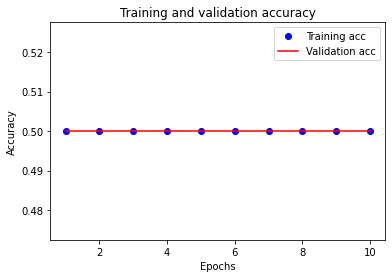

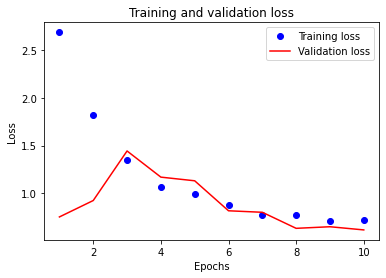

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


#loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


#training
history3 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


#graph
acc = history3.history['binary_accuracy']
val_acc = history3.history['val_binary_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### b. modify Activation Fuction
- 마지막 분류 레이어의 activation function을 sigmoid로 바꾸니 성능 개선(accuracy 증가, loss 감소)
- accuracy : 0.65, loss : 0.66
- fluctuation problem of validation accuracy : training data의 수가 충분하지 않다는....  
https://stackoverflow.com/questions/62606055/cnn-vgg-16-strange-behaviour-on-validation-accuracy

In [ ]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3)) # input size : 256*256, channel 3ea
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer) # filter 32ea, kernal size : 3*3, padding
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x) 
# x=tf.keras.layers.BatchNormalization()(x) 
# x=tf.keras.layers.MaxPool2D((2, 2))(x) #maxpooling

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x) #VGG16 모델은 원래 output이 원래 1000이지만 binary 모델이니 1로 설정

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 128)     1475

Epoch 1/10
125/125 [==============================] - 45s 348ms/step - loss: 2.4210 - binary_accuracy: 0.5365 - val_loss: 0.6942 - val_binary_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 43s 344ms/step - loss: 1.7996 - binary_accuracy: 0.5445 - val_loss: 1.5264 - val_binary_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 43s 346ms/step - loss: 1.2724 - binary_accuracy: 0.5765 - val_loss: 0.7010 - val_binary_accuracy: 0.5390
Epoch 4/10
125/125 [==============================] - 43s 345ms/step - loss: 1.0608 - binary_accuracy: 0.5850 - val_loss: 0.8782 - val_binary_accuracy: 0.5440
Epoch 5/10
125/125 [==============================] - 43s 346ms/step - loss: 1.0027 - binary_accuracy: 0.5950 - val_loss: 0.7222 - val_binary_accuracy: 0.5990
Epoch 6/10
125/125 [==============================] - 43s 345ms/step - loss: 0.9861 - binary_accuracy: 0.5980 - val_loss: 0.7221 - val_binary_accuracy: 0.5900
Epoch 7/10
125/125 [==========================

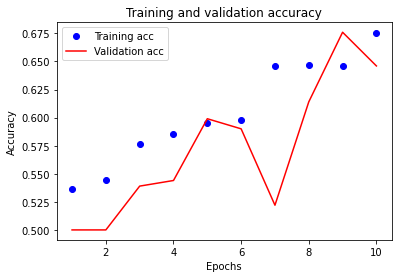

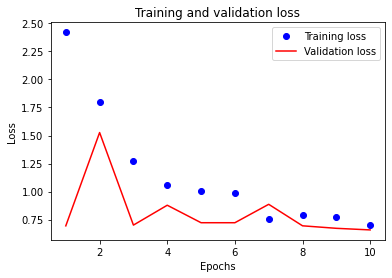

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


#loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


#training
history4 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size, # data generation을 사용했기 때문에 넣은 코드임.
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


#graph
acc = history4.history['binary_accuracy']
val_acc = history4.history['val_binary_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### c. modify Hyperparameter
- epochs를 늘렸더니 더 나아짐.  
- accuracy : 0.78, loss : 0.45
- validation data의 값들이 급격하게 변함. => 여러 hyperparameter를 바꾸어 봤지만 나아지지 않았음. 

Epoch 1/20
125/125 [==============================] - 45s 347ms/step - loss: 1.9475 - binary_accuracy: 0.5405 - val_loss: 9.5991 - val_binary_accuracy: 0.5000
Epoch 2/20
125/125 [==============================] - 43s 345ms/step - loss: 1.5083 - binary_accuracy: 0.5615 - val_loss: 2.0717 - val_binary_accuracy: 0.5000
Epoch 3/20
125/125 [==============================] - 43s 344ms/step - loss: 1.2664 - binary_accuracy: 0.5465 - val_loss: 1.3800 - val_binary_accuracy: 0.5220
Epoch 4/20
125/125 [==============================] - 43s 345ms/step - loss: 1.0023 - binary_accuracy: 0.5820 - val_loss: 1.3648 - val_binary_accuracy: 0.5680
Epoch 5/20
125/125 [==============================] - 43s 344ms/step - loss: 1.0334 - binary_accuracy: 0.5785 - val_loss: 1.1439 - val_binary_accuracy: 0.6050
Epoch 6/20
125/125 [==============================] - 43s 344ms/step - loss: 0.8908 - binary_accuracy: 0.5980 - val_loss: 0.7910 - val_binary_accuracy: 0.5980
Epoch 7/20
125/125 [==========================

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f753a76d8b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


Epoch 11/20
125/125 [==============================] - 43s 346ms/step - loss: 0.6647 - binary_accuracy: 0.6720 - val_loss: 0.6052 - val_binary_accuracy: 0.6820
Epoch 12/20
125/125 [==============================] - 43s 343ms/step - loss: 0.6293 - binary_accuracy: 0.7065 - val_loss: 0.5829 - val_binary_accuracy: 0.6980
Epoch 13/20
125/125 [==============================] - 43s 346ms/step - loss: 0.6269 - binary_accuracy: 0.6990 - val_loss: 0.7636 - val_binary_accuracy: 0.6110
Epoch 14/20
125/125 [==============================] - 43s 345ms/step - loss: 0.6116 - binary_accuracy: 0.7155 - val_loss: 0.5715 - val_binary_accuracy: 0.7020
Epoch 15/20
125/125 [==============================] - 43s 346ms/step - loss: 0.5775 - binary_accuracy: 0.7125 - val_loss: 0.5368 - val_binary_accuracy: 0.7260
Epoch 16/20
125/125 [==============================] - 43s 346ms/step - loss: 0.5695 - binary_accuracy: 0.7220 - val_loss: 0.6079 - val_binary_accuracy: 0.6920
Epoch 17/20
125/125 [===================

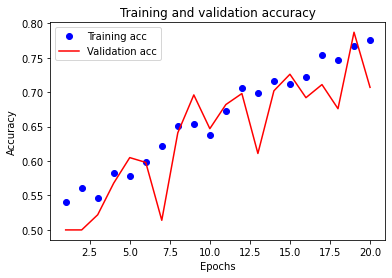

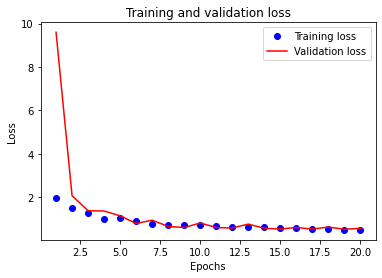

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


#loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


#training
history5 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size, # data generation을 사용했기 때문에 넣은 코드임.
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


#graph
acc = history5.history['binary_accuracy']
val_acc = history5.history['val_binary_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### d. modify Optimizer
- optimizer를 SGD로 변경
- training data보다 validation data의 성능이 좋음. => underfit : 더 많은 학습과 더 복잡한 모델이 필요함.
- underfit => epochs 20->30, learning_rate 0.0001->0.001으로 해결
- https://22-22.tistory.com/35

Epoch 1/30
125/125 [==============================] - 43s 333ms/step - loss: 0.8209 - binary_accuracy: 0.5800 - val_loss: 0.7342 - val_binary_accuracy: 0.6130
Epoch 2/30
125/125 [==============================] - 41s 326ms/step - loss: 0.7953 - binary_accuracy: 0.6100 - val_loss: 0.6441 - val_binary_accuracy: 0.6680
Epoch 3/30
125/125 [==============================] - 41s 327ms/step - loss: 0.7621 - binary_accuracy: 0.6010 - val_loss: 0.6476 - val_binary_accuracy: 0.6440
Epoch 4/30
125/125 [==============================] - 41s 326ms/step - loss: 0.7277 - binary_accuracy: 0.6240 - val_loss: 0.6137 - val_binary_accuracy: 0.6690
Epoch 5/30
125/125 [==============================] - 41s 326ms/step - loss: 0.7000 - binary_accuracy: 0.6495 - val_loss: 0.6080 - val_binary_accuracy: 0.6710
Epoch 6/30
125/125 [==============================] - 41s 326ms/step - loss: 0.6908 - binary_accuracy: 0.6470 - val_loss: 0.6493 - val_binary_accuracy: 0.6640
Epoch 7/30
125/125 [==========================

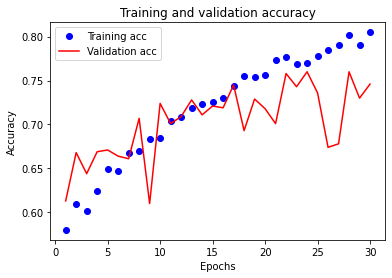

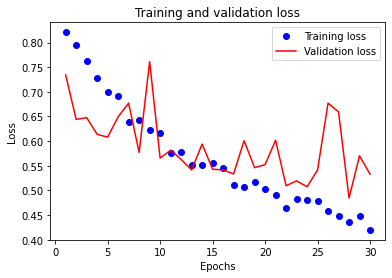

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 30
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


#loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.SGD(learning_rate=0.001) # SGD
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


#training
history6 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size, # data generation을 사용했기 때문에 넣은 코드임.
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


#graph
acc = history6.history['binary_accuracy']
val_acc = history6.history['val_binary_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

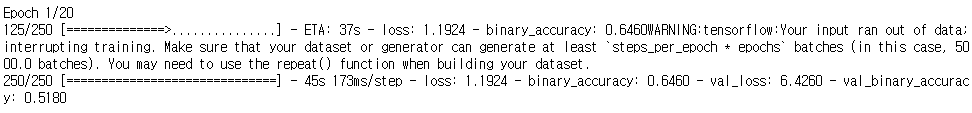

## 1-5.Pretrained Model
- normalization이 안들어간 model인 pretrained model 성능이 안좋음.

In [ ]:
from tensorflow.keras.applications import VGG16

pre_model = VGG16(weights ='imagenet',
             include_top= False,
             input_shape=(256,256,3))
pre_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(pre_model)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              134221824 
_________________________________________________________________
dropout_6 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

Epoch 1/20
125/125 [==============================] - 41s 320ms/step - loss: 0.7073 - binary_accuracy: 0.5025 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/20
125/125 [==============================] - 39s 313ms/step - loss: 0.6932 - binary_accuracy: 0.4975 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/20
125/125 [==============================] - 39s 314ms/step - loss: 0.6933 - binary_accuracy: 0.4930 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/20
125/125 [==============================] - 39s 314ms/step - loss: 0.6932 - binary_accuracy: 0.4970 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/20
125/125 [==============================] - 39s 314ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/20
125/125 [==============================] - 39s 314ms/step - loss: 0.6933 - binary_accuracy: 0.4785 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 7/20
125/125 [==========================

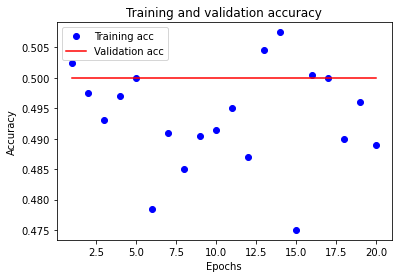

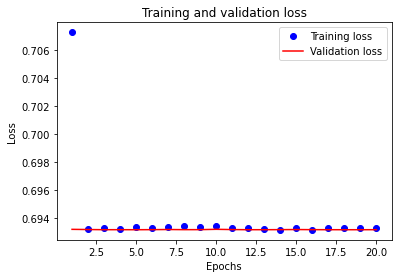

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256
# 파라미터 수정으로 성능 향상 기대


#loss function
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
optimizer=optimize,
metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.


#training
history7 = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size, # data generation을 사용했기 때문에 넣은 코드임.
epochs=epochs,
validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)


#graph
acc = history7.history['binary_accuracy']
val_acc = history7.history['val_binary_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 1-6.Review
- 이 프로젝트에서는 Dropout layers 추가와 activation function을 바꾸어 결국 accuracy : 0.78의 값을 얻었음.
- 여러 많은 것들을 고려하여 최적의 모델을 만드는 것은 시간과 비용이 많이 소요되는 일이라는 생각이 듬.
- 마지막 pretrained model이라고 학습한 것은 성능이 이전보다 좋지 않음. 적당한 가중치의 것을 찾아야 함. 

# 2.Object Detection

In [ ]:
!pip3 install tensorflow-estimator==2.6.0

     |████████████████████████████████| 462 kB 6.6 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
tensorflow-gpu 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.0.1 which is incompatible.


## 2-1.Load Module and Make Function

In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [ ]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmp8ayvsm2a.jpg.


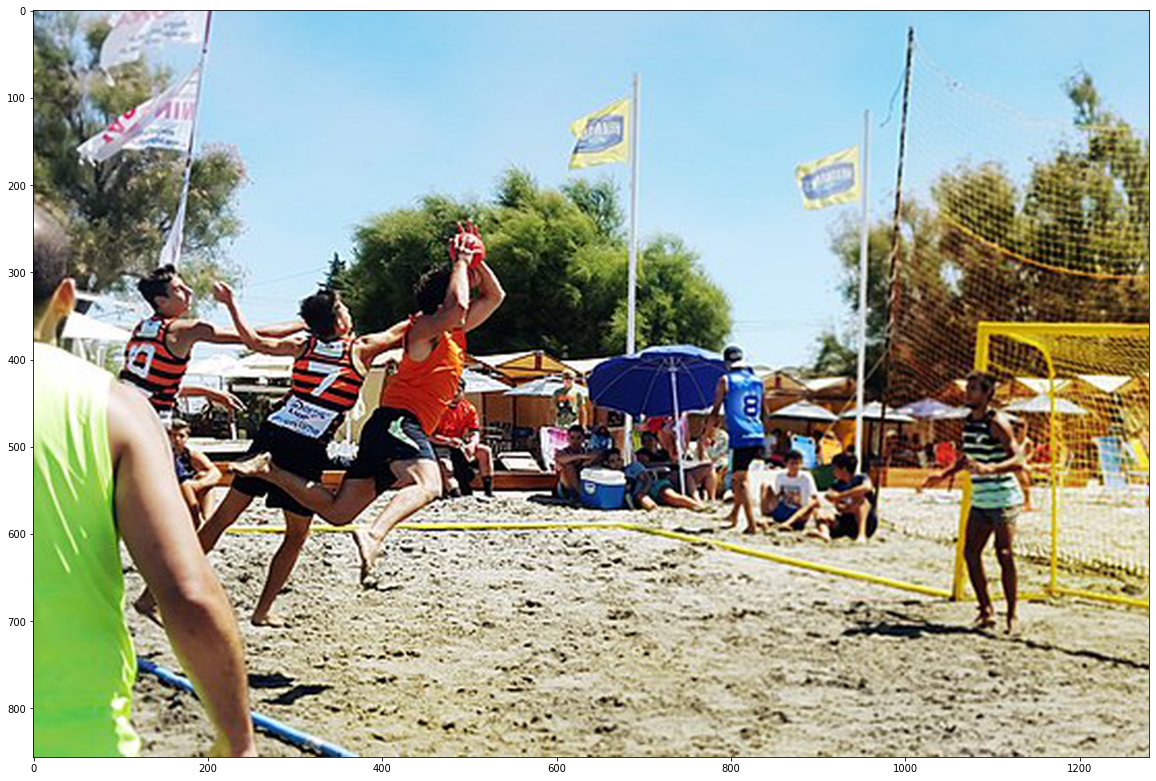

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

## 2-2.faster_rcnn/openimages_v4/inception_resnet_v2

In [ ]:
# tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러옵니다.
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  3.2422585487365723


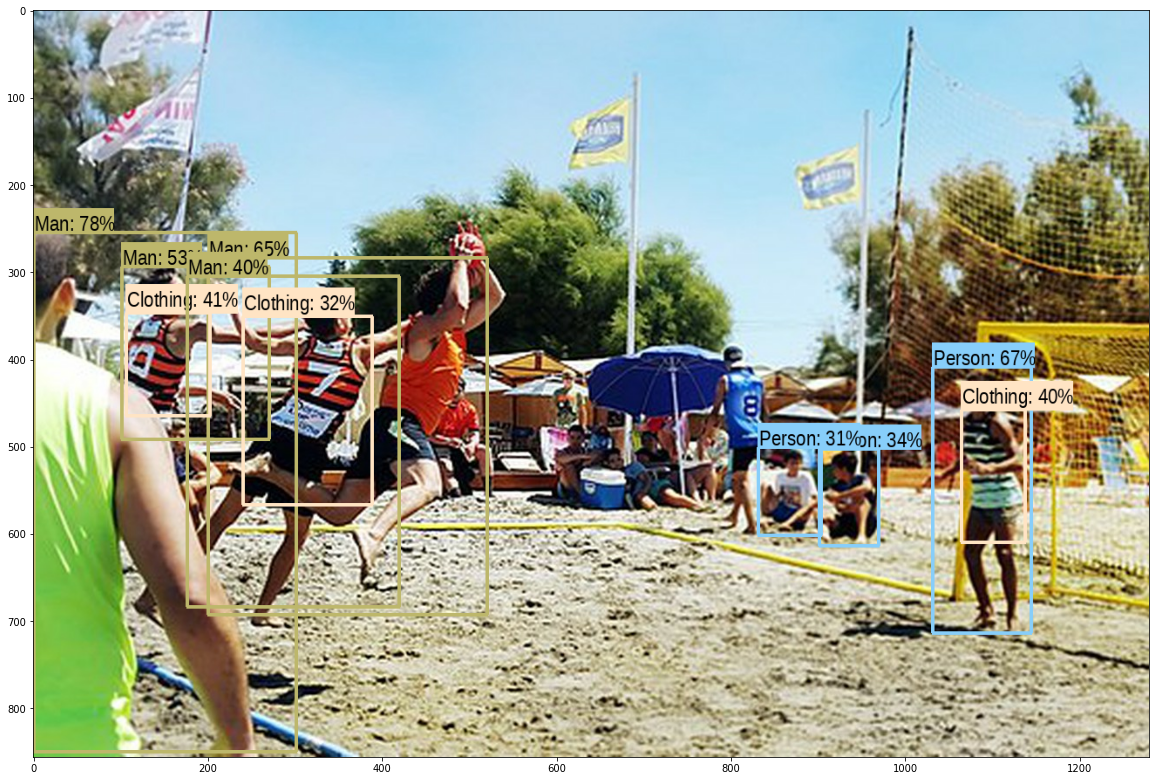

In [ ]:
run_detector(detector, downloaded_image_path)

## 2-3.other images

Image downloaded to /tmp/tmprltn2gzj.jpg.


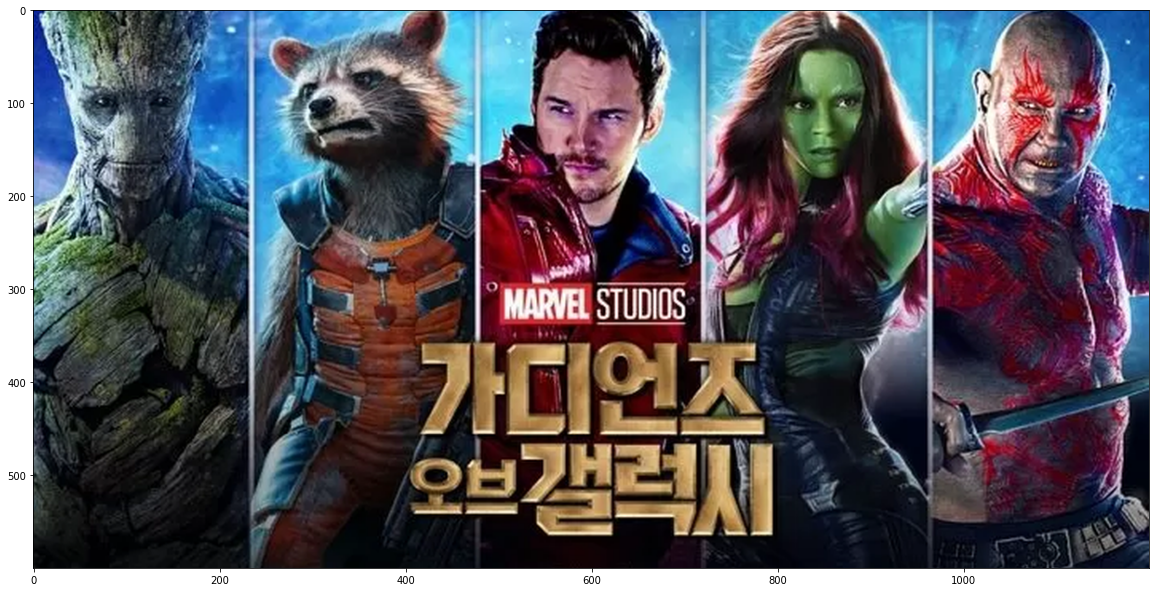

In [ ]:
image_url = "https://img.insight.co.kr/static/2023/01/07/700/img_20230107113844_lg0o75aq.webp"
downloaded_image_path = download_and_resize_image(image_url, 1200, 600, True)



Found 100 objects.
Inference time:  1.3395967483520508


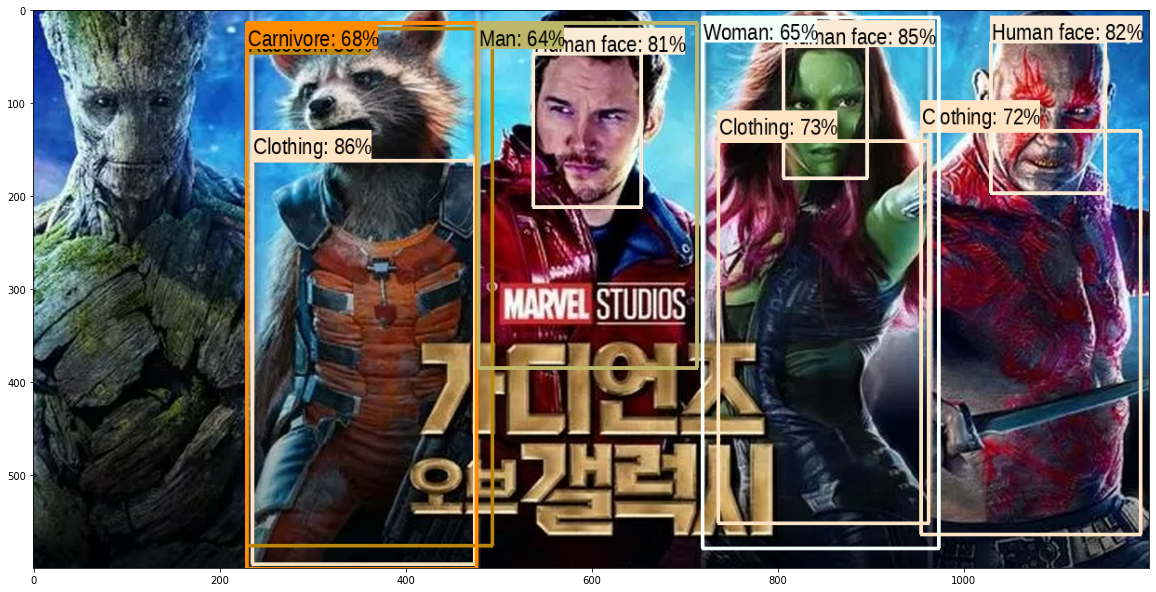

In [ ]:
run_detector(detector, downloaded_image_path)

## 2-4.other Pretrained Model

### a. openimages_v4/ssd/mobilenet_v2

In [ ]:
# tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러옵니다.
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"  

detector2 = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Inference time:  5.4171788692474365


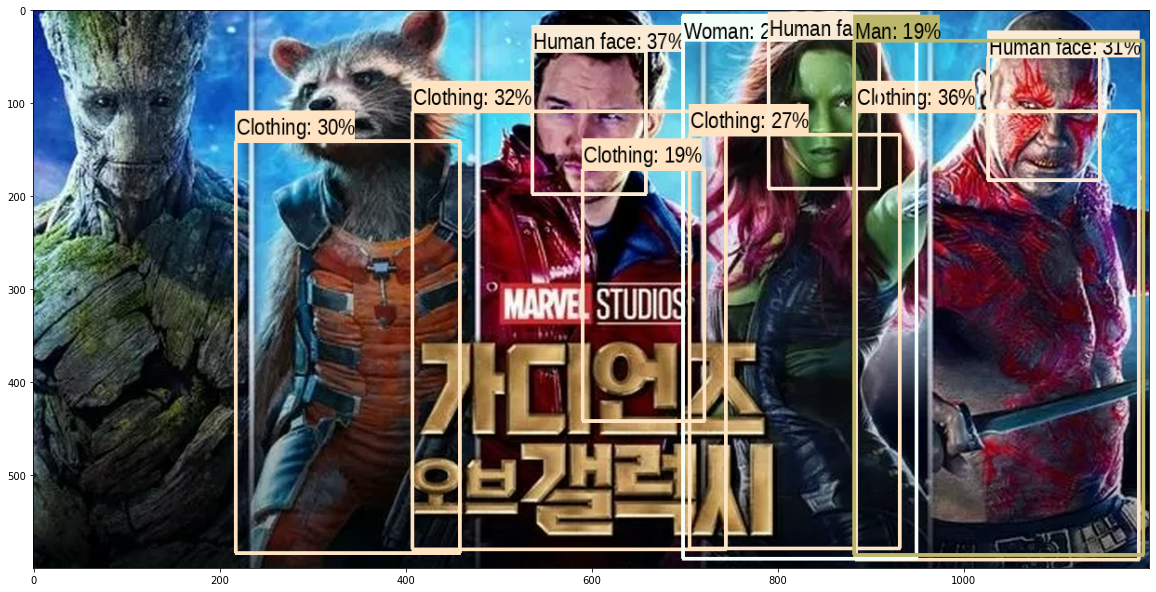

In [ ]:
run_detector(detector2, downloaded_image_path)

## 2-5.Review
- faster_rcnn/openimages_v4/inception_resnet_v2 : 시간은 1.34이고 로켓을 육식동물로 분류함. 그루트를 인식하지 못함.
- openimages_v4/ssd/mobilenet_v2 : 시간은 5.42, 로켓과 그루트를 인식하지 못함.
- 다른 모델 여럿을 로드할 때 문제가 있어 로드도 못함.  
</br>
- https://tfhub.dev/  
